## Reading The Data-Set

In [3]:
import pandas as pd
Exer_7_DF = pd.read_csv(r'C:\SEM3\Slides data diagram\Prepared_Data.csv')
Exer_7_DF.head()

,avg_income,CAMPUS_VISIT,CONTACT_CODE1,Contact_Date,Contact_Month,Contact_Year,distance,Target_Enroll,ETHNICITY,hscrat,...,premiere,REFERRAL_CNTCTS,satscore,SELF_INIT_CNTCTS,sex,SOLICITED_CNTCTS,telecq,TERRITORY,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS
0,53494,0,9,1,9,2012,318,0,1,0,...,0,0,1149,1,1,0,2,10,1,0
1,53494,0,2,12,2,2014,318,0,3,0,...,0,0,1149,1,1,0,2,10,1,0
2,53494,0,33,16,1,2015,318,0,1,0,...,0,0,1149,0,1,1,2,10,1,0
3,53494,0,9,11,3,2015,318,0,1,0,...,0,0,1149,1,0,0,2,10,1,0
4,53494,0,78,28,3,2015,318,0,4,0,...,0,0,1090,2,1,0,2,10,2,0


## Data Partition

In [5]:
x = Exer_7_DF.drop("Target_Enroll", axis = 1)
y = Exer_7_DF["Target_Enroll"]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression      # Fitting Logistic Regression model on training data set
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\kastu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
predictions = logmodel.predict(x_test)
from sklearn.metrics import classification_report
classification_report(y_test, predictions)           # Comparing actual and predicted target variable values for validation data-set

'              precision    recall  f1-score   support\n\n           0       0.86      0.92      0.89       745\n           1       0.92      0.86      0.89       803\n\n   micro avg       0.89      0.89      0.89      1548\n   macro avg       0.89      0.89      0.89      1548\nweighted avg       0.89      0.89      0.89      1548\n'

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)       # Building Confusion Matrix

array([[682,  63],
       [111, 692]], dtype=int64)

In [10]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, predictions))    # Result is 88.75% overall accuracy of the model

0.8875968992248062


## Stepwise Selection for Logistic Regression

In [11]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [13]:
def stepwise_selection(x, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(x, y)

print('resulting features:')
print(result)

C:\Users\kastu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\kastu\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  SELF_INIT_CNTCTS               with p-value 0.0
Add  LEVEL_YEAR                     with p-value 4.56208e-54
Add  init_span                      with p-value 1.37913e-36
Add  telecq                         with p-value 2.64209e-23
Add  avg_income                     with p-value 3.94201e-20
Add  hscrat                         with p-value 1.87283e-16
Add  Instate                        with p-value 4.16108e-17
Add  interest                       with p-value 1.85884e-14
Add  satscore                       with p-value 1.35597e-11
Add  CAMPUS_VISIT                   with p-value 9.62668e-10
Add  REFERRAL_CNTCTS                with p-value 1.52694e-05
Add  premiere                       with p-value 7.27378e-05
Add  mailq                          with p-value 0.000261835
Add  sex                            with p-value 0.00122892
Add  SOLICITED_CNTCTS               with p-value 0.00582582
Add  Contact_Year                   with p-value 0.00600667
Add  Contact_Month                 

C:\Users\kastu\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


resulting features:
['SELF_INIT_CNTCTS', 'LEVEL_YEAR', 'telecq', 'avg_income', 'hscrat', 'Instate', 'interest', 'satscore', 'CAMPUS_VISIT', 'REFERRAL_CNTCTS', 'premiere', 'mailq', 'sex', 'SOLICITED_CNTCTS', 'Contact_Year', 'Contact_Month']


## Data Parition

In [15]:
X = Exer_7_DF.drop(["Target_Enroll", "init_span"], axis = 1)  # Keeping only variables which are suggested in step wise selection
Y = Exer_7_DF["Target_Enroll"]    # Target Variable

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=1)

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression      # Fitting Logistic Regression model on training data set
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\Users\kastu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
classification_report(Y_test, predictions)           # Comparing actual and predicted target variable values for validation data-set

'              precision    recall  f1-score   support\n\n           0       0.86      0.92      0.89       745\n           1       0.92      0.86      0.89       803\n\n   micro avg       0.89      0.89      0.89      1548\n   macro avg       0.89      0.89      0.89      1548\nweighted avg       0.89      0.89      0.89      1548\n'

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)       # Building Confusion Matrix

array([[684,  61],
       [115, 688]], dtype=int64)

In [21]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, predictions))    # Result is 88.63% overall accuracy of the model a little less than without stepwise selection method

0.8863049095607235


## Random Forest Regressor

In [22]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [129]:
# Labels are the values we want to predict
labels = np.array(Exer_7_DF["Target_Enroll"])
# Remove the labels from the features
# axis 1 refers to the columns
X_whole= Exer_7_DF.drop('Target_Enroll', axis = 1)
# Saving feature names for later use
feature_list = list(X_whole.columns)
# Convert to numpy array
X_whole = np.array(X_whole)

In [130]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_whole,labels,test_size = 0.3, random_state=1)

In [131]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X1_train, Y1_train);

In [132]:
# Use the forest's predict method on the test data
predictions = rf.predict(X1_test)
# Calculate the absolute errors
errors = abs((predictions - Y1_test)**2)
# Print out the mean absolute error (mae)
print('Root Mean Squared Error:', round(((np.mean(errors))**0.5), 2))

Root Mean Squared Error: 0.26


## Backward Elemination Random Forest Classifier Algorithm

## Different method of Random Forest

In [133]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [134]:
# Build RF classifier to use in Columns selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step Backward Elemination selection
sfs1 = sfs(clf,
           k_features=5,
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X1_train, Y1_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   52.4s finished

[2019-10-16 00:27:16] Features: 25/5 -- score: 0.9252433880070343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   49.5s finished

[2019-10-16 00:28:05] Features: 24/5 -- score: 0.927182829316138[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   47.2s finished

[2019-10-16 00:28:53] Features: 23/5 -- score: 0.9291199718010905[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [135]:
# Which Columns?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 5, 13, 18, 24]


In [136]:
# Build full model with selected features
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X1_train[:, feat_cols], Y1_train)

Y_train_pred = clf.predict(X1_train[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(Y1_train, Y_train_pred))

Y_test_pred = clf.predict(X1_test[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(Y1_test, Y_test_pred))

Training accuracy on selected features: 0.904
Testing accuracy on selected features: 0.900


## LASSO (L1) Regression

## Gradient Boosting

In [137]:
#import XGBoost classifier and accuracy
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [138]:
# make predictions for test set
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [139]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.80%


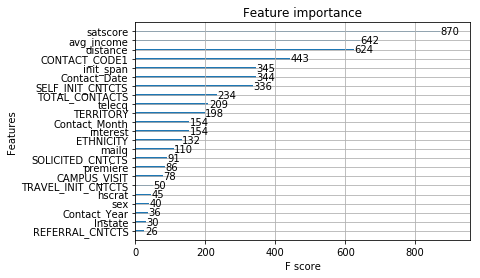

In [140]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model)
plt.show()

## Model based on selection

In [144]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=26, Accuracy: 92.31%
Thresh=0.000, n=26, Accuracy: 92.31%
Thresh=0.000, n=26, Accuracy: 92.31%
Thresh=0.010, n=23, Accuracy: 92.31%
Thresh=0.010, n=22, Accuracy: 92.31%
Thresh=0.010, n=21, Accuracy: 91.99%
Thresh=0.010, n=20, Accuracy: 91.93%
Thresh=0.010, n=19, Accuracy: 91.93%
Thresh=0.011, n=18, Accuracy: 92.05%
Thresh=0.011, n=17, Accuracy: 92.05%
Thresh=0.012, n=16, Accuracy: 92.12%
Thresh=0.012, n=15, Accuracy: 92.05%
Thresh=0.013, n=14, Accuracy: 92.12%
Thresh=0.015, n=13, Accuracy: 91.99%
Thresh=0.015, n=12, Accuracy: 92.18%
Thresh=0.016, n=11, Accuracy: 92.05%
Thresh=0.017, n=10, Accuracy: 91.47%
Thresh=0.017, n=9, Accuracy: 91.73%
Thresh=0.019, n=8, Accuracy: 91.99%
Thresh=0.025, n=7, Accuracy: 91.41%
Thresh=0.028, n=6, Accuracy: 91.02%
Thresh=0.030, n=5, Accuracy: 90.44%
Thresh=0.030, n=4, Accuracy: 90.31%
Thresh=0.031, n=3, Accuracy: 88.44%
Thresh=0.032, n=2, Accuracy: 88.44%
Thresh=0.618, n=1, Accuracy: 88.18%


## Decision Tree

In [149]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

In [150]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [154]:
y_pred = dt.predict(x_test)

In [159]:
new_value = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(new_value, predictions)

array([[667,  78],
       [135, 668]], dtype=int64)

In [175]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Anaconda3\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz'

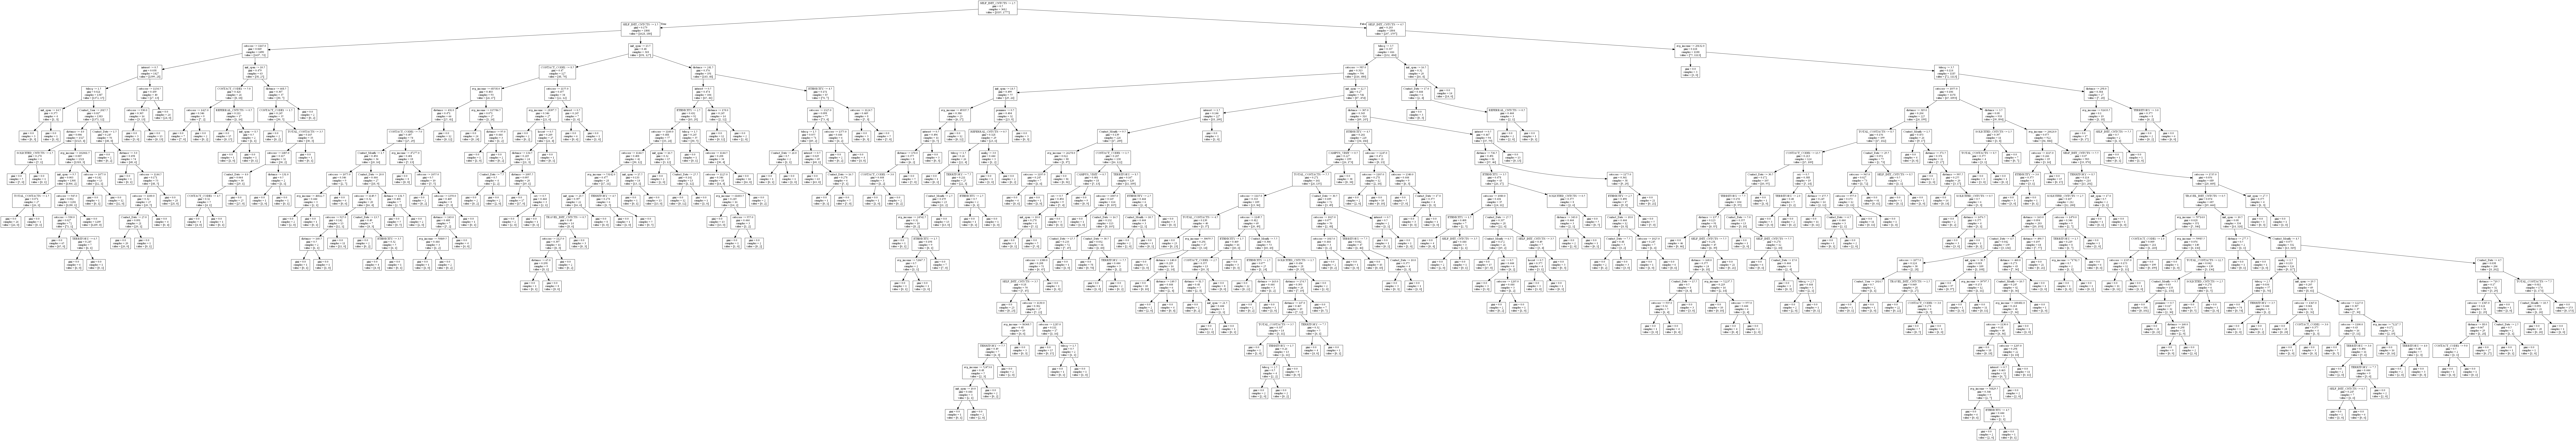

In [176]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=x.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())